In [31]:
# Importing libraries for the project
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy import optimize
import math

from sklearn import metrics

In [2]:
filename = 'data/encodedShroomsV2.csv'
df = pd.read_csv(filename)
df

,10010000001000000100001000000010100101000010000000010001000010001000100000000100000010001000001000100000000100,00010000001000000000101000100000100110000010000000011000000010001000100000000100000010001000001000000100000010,00000010001000010000001000010000100110000000001000011000000010001000100000000100000010001000001000000100000010,10010000010000010000001000000010100101000000001000010001000010001000100000000100000010001000001000100000000100,00010000001010000000010000000100101010000010000000100001000010001000100000000100000010001001000000000100010000,00010000010000000000101000100000100110000000001000011000000010001000100000000100000010001000001000100000000010,00000010001000010000001000100000100110100000000000011000000010001000100000000100000010001000001000100000000010,00000010010000010000001000010000100110000000001000011000000010001000100000000100000010001000001000000100000100,10010000010000010000001000000010100101000000000010010001000010001000100000000100000010001000001000100000001000,00000010001000000000101000100000100110100000000000011000000010001000100000000100000010001000001000100000000100,...,00010000001000000100010000000100010110000000000001010010000010001001000000001000000001001000001010000000001000,10001000010000000100010000001000100101000000000100100010000010100000000010000100000010001001000000010000001000.2,10001000001000001000010000000001100101000000000100100010001000001000000010000100000010001001000000010000001000.2,10001000010000000100010100000000100101000000000100100010001000001000000010000100000010001001000000010000001000.2,00001000001000000100010000000100010110000000000001010010000010001001000000001000000001001000001000000010100000,00010000001000000100010000000100010110000000000001010010000010001001000000001000000000101000001000000010001000,01000000001000000100010000000100010110000000001000010010000010001001000000001000000001001000001000000010100000,10001000010000000100010000000001100101000000000100100010000010100000100000000100000010001001000000010000001000.2,00010000001000000100010000000100010110000000000001010010000010001001000000001000000001001000001010000000100000,Unnamed: 8124


In [100]:
# initializing datasets, filling missing values with zeroes
# 3249 -> train 40/test 60
# 4062 -> train 50/test 50
# 4875 -> train 60/test 40
# 5687 -> train 70/test 30
train_size = 5687
X = np.empty((train_size, 109), dtype=int)
y = []
X_test = np.empty((8124-train_size, 109), dtype=int)
y_test = []
j = 0
for column in df:
    # First [training_size] data are for training, the rest is for testing
    if j < train_size:
        # The pandas added .1 and .2 to some data without explanation, so these can be ignored.
        # For every data we append the y array with the first bit. The rest will be appended to the X_row array.
        if len(df[column].name) == 110:
            X_row = []
            if df[column].name[0] == '1':
                y.append(1)
            else:
                y.append(0)
        
            for i in range(110):
                if i > 0:
                    if df[column].name[i] == '1':
                        X_row.append(1)
                    else:
                        X_row.append(0)
            # The X_row will be appended to the 2D X array
            X[j] = X_row
        if len(df[column].name) == 112:
            X_row = []
            if df[column].name[0] == '1':
                y.append(1)
            else:
                y.append(0)
        
            for i in range(110):
                if i > 0:
                    if df[column].name[i] == '1':
                        X_row.append(1)
                    else:
                        X_row.append(0)
            X[j] = X_row
    # From here, the test data arrays will be filled. The logic is the same as before
    else:
        if len(df[column].name) == 110:
            X_row = []
            if df[column].name[0] == '1':
                y_test.append(1)
            else:
                y_test.append(0)
        
            for i in range(110):
                if i > 0:
                    if df[column].name[i] == '1':
                        X_row.append(1)
                    else:
                        X_row.append(0)
            X_test[j-train_size] = X_row
        if len(df[column].name) == 112:
            X_row = []
            if df[column].name[0] == '1':
                y_test.append(1)
            else:
                y_test.append(0)
        
            for i in range(110):
                if i > 0:
                    if df[column].name[i] == '1':
                        X_row.append(1)
                    else:
                        X_row.append(0)
            X_test[j-train_size] = X_row
    j = j+1

# The created arrays will be converted to numpy arrays
y = np.array(y)
y_test = np.array(y_test)

In [101]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [102]:
y

array([1, 0, 0, ..., 1, 1, 0])

In [103]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    Instructions
    ------------
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    # ====================== YOUR CODE HERE ======================

    g = 1 / (1 + np.exp(-z))

    # =============================================================
    return g

In [104]:
# Test the implementation of sigmoid function here
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [105]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = (X.shape)

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [106]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
        
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # ====================== YOUR CODE HERE ======================
    h = sigmoid(X.dot(theta.T))
    
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)
    # =============================================================
    return J, grad

In [107]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))

# Compute and display cost and gradient with non-zero theta
#test_theta = np.array([-24, 0.2, 0.2])
#cost, grad = costFunction(test_theta, X, y)

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[0.1328, 0.0563, -0.0002]


In [108]:
# set options for optimize.minimize
options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
theta

Cost at theta found by optimize.minimize: 0.000
Expected cost (approx): 0.203

theta:


C:\Users\jethr\AppData\Local\Temp\ipykernel_5664\1102138006.py:44: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


array([ -0.28456041,  -0.32440406,   1.37895898,  -0.56599641,
        -0.26208052,  -1.873858  ,   1.44724742,  -1.66400753,
         1.96638788,   0.19094303,  -0.77526438,  -2.6981517 ,
        -0.02422961,  -1.10352029,  -1.0764812 ,   1.85439682,
        -1.12145721,   0.53161147,   1.46827301,   1.91915915,
        -0.07162504,  -0.7164391 ,   0.13024683,   7.03804755,
         7.94992853,   0.        ,  -8.74078831,  -8.74078866,
         2.44580921, -10.19278286,   7.71316956,   2.59382557,
        -0.28456041,   0.        ,  -3.54126073,   3.60242225,
        -4.48777632,   4.04751891,  -0.39237484,   0.0181581 ,
         1.63776137,   0.        ,  -1.16394589,  -0.9590506 ,
        -0.7868561 ,  -2.11478799,  -1.04315069,   5.33968651,
        -0.98426324,   0.        ,  -3.11543079,   2.70060328,
        -4.15983565,  -3.53401001,   0.54996093,  -1.44270294,
         7.39197817,  -3.86618814,   8.24214861,   0.        ,
        -4.08583222,  -3.63350286,   1.74119179,   3.31

In [109]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vecotor of shape (n+1, ).
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X. 
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned 
    logistic regression parameters.You should set p to a vector of 0's and 1's    
    """
    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros(m)

    # ====================== YOUR CODE HERE ======================
    p = np.round(sigmoid(X.dot(theta.T)))
    
    
    # ============================================================
    return p

In [110]:
test = np.column_stack((y_test, X_test))
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot(list(test[4]), theta))
print('we predict an admission probability of {:.3f}'.format(prob))

# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))

we predict an admission probability of 0.000
Train Accuracy: 100.00 %


In [111]:
m_val, n_val = (X_test.shape)

X_val = np.concatenate([np.ones((m_val, 1)), X_test], axis=1)
p_val = predict(theta, X_val)

In [112]:
score = 0
for i in range(len(p_val)):
    prob = sigmoid(np.dot(list(test[i]), theta))
    print(prob)
    if p_val[i] == y_test[i]:
        score = score + 1

3.885169426948106e-06
0.9998162083567244
0.9999999999910458
0.9999934100173322
1.1155373058837823e-05
0.0003144905383895003
0.9999999999989737
0.9999999999857805
1.0599018194463088e-06
0.9999999999961302
0.9999668135862668
2.2425048447001675e-07
0.9999999999997726
0.9999999999993301
0.9999999996127675
4.5470854612829435e-06
0.999984170773692
1.8028616103855508e-06
0.9999676506199016
0.9999623235681024
0.999999999966237
0.9999913144329907
0.9999934100173322
0.9999822904154578
0.000112463094493164
0.9999943999396986
0.9999999999628724
0.00021957433322911105
1.5462705966466708e-05
0.9999913134680898
0.9998008693797943
0.9999931785490488
0.999933617612055
5.72269035572208e-06
0.9999999997465894
0.9998309949626788
0.9999967322568262
1.1275675327815436e-07
0.9999984664660143
0.999997893256582
0.00011490885821369844
0.9999696540707679
0.9999951535491068
0.9999999999885623
2.1238795758712757e-06
8.84730853562571e-06
9.202092039553233e-06
1.9171528381698283e-07
0.9999769439103617
0.999998738265

In [113]:
print("Accuracy:",metrics.accuracy_score(y_test, p_val))

Accuracy: 0.9228559704554781


In [114]:
metrics.precision_score(y_test, p_val)

0.91

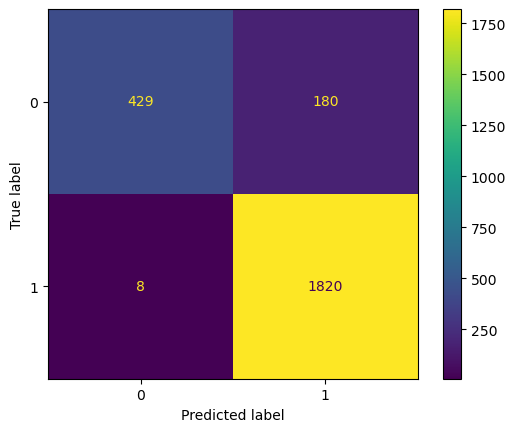

In [116]:
cm = metrics.confusion_matrix(y_test, p_val)
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()